In [1]:
import osmnx as ox
import networkx as nx
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
ox.config(use_cache=True, log_console=True)
ox.__version__

'0.8.2'

In [2]:
nx.__version__

'2.1'

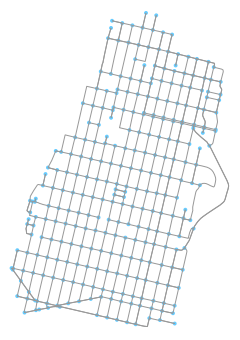

In [2]:
# get a graph for some city
# Simplification is normally done by OSMnx automatically under the hood
G = ox.graph_from_place('Hoboken, New Jersey', network_type = 'drive')
# this edge is wrong, it is equal
# We need to delete this edge
#G.remove_edge(293301804, 293301804)
#ox.plot_graph(ox.project_graph(G))
fig, ax = ox.plot_graph(G)

In [3]:
Roads = list(G.edges())
# keep {'primary', 'secondary', 'tertiary', 'residential', 'trunk'} only
for r in Roads:
    key = [a for a in G.adj[r[0]][r[1]].keys()]
    proper = G.adj[r[0]][r[1]][key[0]]['highway']
    if 'motor' in proper or 'motor_link' in proper:
        G.remove_edge(r[0],r[1])
# Node list
Roads = list(G.edges())
node_list = []
for r in Roads:
    node_list.append(r[0])
    node_list.append(r[1])
node_list = set(node_list)
# remove wrong roads with (a,a)
Roads = list(G.edges)
for r in Roads:
    if r[0]==r[1]:
        G.remove_edge(r[0],r[1])
# remove duplicate roads
do = 1
while do > 0:
    store_edge = []
    Roads = list(G.edges())
    for r in Roads:
        if r in store_edge:
            G.remove_edge(r[0],r[1])
        else:
            store_edge.append(r)
    do = len(Roads)-len(G.edges())
# we need an undirected graph to find neighbors of each node
G_undir = G.to_undirected()
# remove dead end and single node
do = 1
while do > 0:
    Nodes = list(G.nodes())
    G_undir = G.to_undirected()
    for n in Nodes:
        if n not in node_list or len([a for a in G_undir.neighbors(n)]) == 1:
            G.remove_node(n)
    do = len(Nodes) - len(G)

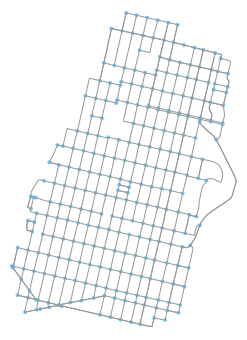

In [4]:
fig, ax = ox.plot_graph(G)

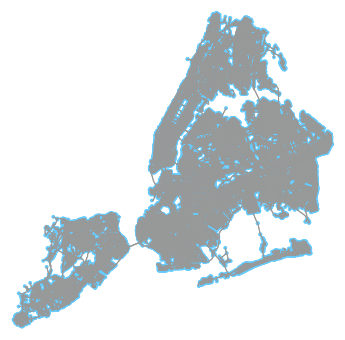

In [31]:
# New York City
G = ox.graph_from_place('New York City, New York', network_type = 'drive')
#ox.plot_graph(ox.project_graph(G))
fig, ax = ox.plot_graph(G)

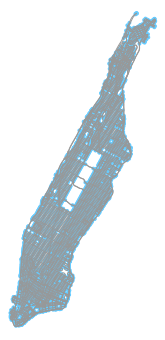

In [2]:
# Mahanton, still too large.
G = ox.graph_from_place('Manhattan, New York City', network_type = 'drive')
# these edges are wrong, it is equal
fig, ax = ox.plot_graph(G)

In [3]:
# Remove unnecessary roads
Roads = list(G.edges())
# keep {'primary', 'secondary', 'tertiary', 'residential', 'trunk'} only
for r in Roads:
    key = [a for a in G.adj[r[0]][r[1]].keys()]
    proper = G.adj[r[0]][r[1]][key[0]]['highway']
    if 'motor' in proper or 'motor_link' in proper:
        G.remove_edge(r[0],r[1])
# Node list
Roads = list(G.edges())
node_list = []
for r in Roads:
    node_list.append(r[0])
    node_list.append(r[1])
node_list = set(node_list)
# remove wrong roads with (a,a)
Roads = list(G.edges)
for r in Roads:
    if r[0]==r[1]:
        G.remove_edge(r[0],r[1])
# remove duplicate roads
do = 1
while do > 0:
    store_edge = []
    Roads = list(G.edges())
    for r in Roads:
        if r in store_edge:
            G.remove_edge(r[0],r[1])
        else:
            store_edge.append(r)
    do = len(Roads)-len(G.edges())
# we need an undirected graph to find neighbors of each node
G_undir = G.to_undirected()
# remove dead end and single node
do = 1
while do > 0:
    Nodes = list(G.nodes())
    G_undir = G.to_undirected()
    for n in Nodes:
        if n not in node_list or len([a for a in G_undir.neighbors(n)]) == 1:
            G.remove_node(n)
    do = len(Nodes) - len(G)

In [5]:
G.node[1773076511]

{'highway': 'traffic_signals',
 'osmid': 1773076511,
 'x': -73.9939823,
 'y': 40.7203048}

In [93]:
G.edges[103856727, 103856729, 0]

{'geometry': <shapely.geometry.linestring.LineString at 0x19eadd1ac50>,
 'highway': 'residential',
 'lanes': '1',
 'length': 63.918999999999997,
 'maxspeed': '15',
 'name': 'Stanley Drive',
 'oneway': True,
 'osmid': 11629868}

In [3]:
# Note adj is useful in this case (replace the edge from previous version)
G.adj[103856727][103856729][0]

{'geometry': <shapely.geometry.linestring.LineString at 0x1dbc6027390>,
 'highway': 'residential',
 'lanes': '1',
 'length': 63.918999999999997,
 'maxspeed': '15',
 'name': 'Stanley Drive',
 'oneway': True,
 'osmid': 11629868}

In [5]:
# what sized area does our network cover in square meters?
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

2677894.542562689

In [59]:
G_proj

In [57]:
# show some basic stats about the network
stats = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
for key in sorted(stats.keys()):
    print(key)

circuity_avg
clean_intersection_count
clean_intersection_density_km
edge_density_km
edge_length_avg
edge_length_total
intersection_count
intersection_density_km
k_avg
m
n
node_density_km
self_loop_proportion
street_density_km
street_length_avg
street_length_total
street_segments_count
streets_per_node_avg
streets_per_node_counts
streets_per_node_proportion


In [27]:
# see more stats (mostly topological stuff) with extended_stats
more_stats = ox.extended_stats(G, ecc=True, bc=True, cc=True) #use arguments to turn other toplogical analyses on/off
for key in sorted(more_stats.keys()):
    print(key)

avg_neighbor_degree
avg_neighbor_degree_avg
avg_weighted_neighbor_degree
avg_weighted_neighbor_degree_avg
betweenness_centrality
betweenness_centrality_avg
center
closeness_centrality
closeness_centrality_avg
clustering_coefficient
clustering_coefficient_avg
clustering_coefficient_weighted
clustering_coefficient_weighted_avg
degree_centrality
degree_centrality_avg
diameter
eccentricity
pagerank
pagerank_max
pagerank_max_node
pagerank_min
pagerank_min_node
periphery
radius


In [28]:
# pull up some stat's value
more_stats['radius']

1658.5949999999998

In [60]:
# Visualize street centrality
# edge closeness centrality: convert graph to line graph so edges become nodes and vice versa
# Note: it do not work for networkx 2.1
# edge_centrality = nx.closeness_centrality(nx.line_graph(G))

In [56]:
# get the nearest network node to each point
# we should use (y,x) to find the corresponding point
orig_node = ox.get_nearest_node(G, (40.7454574, -74.0254518))
dest_node = ox.get_nearest_node(G, (40.7538158, -74.0241563))

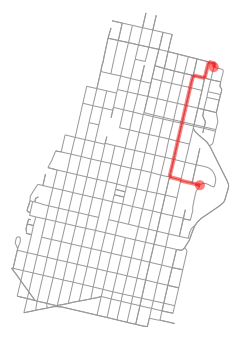

In [57]:
# find the route between these nodes then plot it
route = nx.shortest_path(G, orig_node, dest_node, weight='length')
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [58]:
# how long is our route in meters?
nx.shortest_path_length(G, orig_node, dest_node, weight='length')

1372.549

In [59]:
# how far is it between these two nodes as the crow flies?
ox.great_circle_vec(G.node[orig_node]['y'], G.node[orig_node]['x'],
                    G.node[dest_node]['y'], G.node[dest_node]['x'])

935.79801231377621

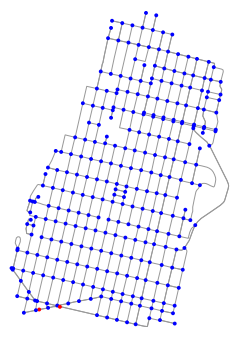

In [61]:
# Simplify street network topology
# turn off strict mode and see what nodes we'd remove, in red
nc = ['b' if ox.is_endpoint(G, node) else 'r' for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_color=nc, node_zorder=3)

In [69]:
# simplify the network
# G = ox.simplify_graph(G)
# fig, ax = ox.plot_graph(G, node_color='b', node_zorder=3)

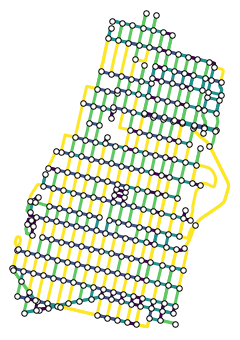

In [65]:
# show the simplified network with edges colored by edge length
ec = ox.get_edge_colors_by_attr(G, attr='length')
fig, ax = ox.plot_graph(G, node_color='w', node_edgecolor='k', node_size=30, 
                           node_zorder=3, edge_color=ec, edge_linewidth=3)

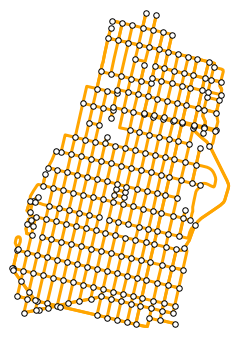

In [66]:
# highlight all parallel edges in purple
ec = ['orange' if key == 0 else 'purple' for u, v, key in G.edges(keys=True)]
fig, ax = ox.plot_graph(G, node_color='w', node_edgecolor='k', node_size=30, 
                           node_zorder=3, edge_color=ec, edge_linewidth=3)

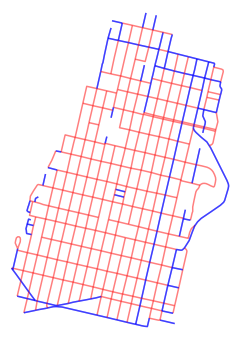

In [68]:
# highlight all the one-way edges 
ec = ['r' if data['oneway'] else 'b' for u, v, key, data in G.edges(keys=True, data=True)]
fig, ax = ox.plot_graph(G, node_size=0, edge_color=ec, edge_linewidth=1.5, edge_alpha=0.5)

In [72]:
G.nodes[103856727]

(103856727, 103856729)
(103856727, 3084667338)
(103856729, 103866344)
(103856729, 103867045)
(103856982, 103862736)
(103856986, 103878608)
(103856986, 103864601)
(103858609, 302464258)
(103861533, 103861535)
(103861533, 103878672)
(103861535, 293337390)
(103861535, 4471393999)
(103861559, 103881170)
(103861561, 103861559)
(103861561, 103883242)
(103861561, 103881168)
(103861592, 5570105500)
(103861592, 103874191)
(103861592, 103878621)
(103861594, 5570105500)
(103861594, 103861592)
(103861932, 4589705937)
(103861932, 103864595)
(103861936, 103861938)
(103861936, 103866264)
(103861936, 103873489)
(103861938, 103878619)
(103861938, 103861940)
(103861940, 103869963)
(103861940, 103861942)
(103861942, 103874296)
(103861942, 103861944)
(103861944, 5572336510)
(103861944, 103866004)
(103861948, 103861950)
(103861948, 103880158)
(103861950, 293337397)
(103861950, 103878672)
(103862736, 103856982)
(103862736, 103864601)
(103862737, 103862736)
(103862737, 103866250)
(103864186, 103872134)
(1038

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [18]:
G.adj[road[0]][road[1]][0]['length']

214.44500000000002

In [9]:
G.adj[42424347][4137021568][0]

{'geometry': <shapely.geometry.linestring.LineString at 0x1c56fe6fdd8>,
 'highway': 'motorway_link',
 'length': 92.953999999999979,
 'maxspeed': '25 mph',
 'oneway': True,
 'osmid': [421832648, 5669321]}

In [117]:
import xml.etree.cElementTree as ET
#root = ET.Element("root")
abcd = ET.Element("sub")
ET.SubElement(abcd, "random1", name = "dffd")
ET.SubElement(abcd, "random2", name = "ccdd")
doc = ET.Element("doc")

ET.SubElement(doc, "field1", name=abcd, abc = "dfffd")

#tree = ET.ElementTree(root)

print(ET.tostring(doc))

# I decided not use xml to represent data, I use json to represent data.

b'<doc><field1 abc="dfffd" name="<Element \'sub\' at 0x0000027BE1C46818>" /><field2 abc="ddfd" name="asdfasd" /></doc>'


In [4]:
# name the road with its order
Roads = list(G.edges())
check_list = {}
for i in range(len(Roads)):
    check_list[Roads[i]] = i + 1

In [5]:
len(check_list)

9070

In [6]:
check_list

{(42448578, 42429840): 6717,
 (42442269, 42432156): 8553,
 (42451766, 42435522): 829,
 (42436359, 42436364): 1955,
 (1672106385, 595245920): 5236,
 (2141026546, 1705982030): 6407,
 (42443674, 42443676): 2632,
 (42448552, 42448554): 6674,
 (42428958, 561035371): 2902,
 (42429330, 42454192): 3360,
 (42453251, 42448979): 2565,
 (42436119, 42436122): 1668,
 (42454798, 42429844): 4441,
 (42440686, 42452084): 6984,
 (42435197, 765367023): 565,
 (42455059, 42433064): 4755,
 (42432665, 42432659): 7180,
 (42443027, 42456060): 234,
 (1919595929, 42455039): 6386,
 (42437890, 42430271): 3779,
 (3639382769, 42445917): 5263,
 (42456831, 5378686574): 6797,
 (42432250, 42432246): 6792,
 (42438506, 42443027): 4570,
 (42439371, 42432928): 5610,
 (42454428, 42430338): 4010,
 (42432737, 42432744): 7281,
 (42443614, 4862610026): 3655,
 (42429630, 42446800): 3692,
 (42442586, 42446218): 8916,
 (42443181, 42421865): 4544,
 (42429023, 42428094): 3017,
 (42429346, 42429348): 3377,
 (42428043, 42428045): 1827,


In [7]:
# find the neighborhood road
def find_nei(road):
    Roads = list(G.edges())
    a = road[0]
    b = road[1]
    road_neibor = []
    for r in Roads:
        if r[0] == a or r[0] == b or r[1] == a or r[1] == b:
            road_neibor.append(r)
    return road_neibor

In [8]:
# Since the some speed information are str, some are digit, we need to conver all to digit
def str2num(speed):
    if type(speed) == list: # two data stored in the same road
        speed = speed[0]
    if len(speed) > 4:
        speed = speed[:2]
    return float(speed)

In [9]:
# find the maxspeed of the road
from numpy.random import RandomState
def find_maxspeed(road):
    # some maxspeed stored in the map
    key = [a for a in G.adj[road[0]][road[1]].keys()]
    if 'maxspeed' in G.adj[road[0]][road[1]][key[0]].keys():
        max_speed = str2num(G.adj[road[0]][road[1]][key[0]]['maxspeed'])
    else:
        # get the mean of its neiborhood's street
        #road_nei = find_nei(road)
        #speed = [str2num(G.adj[r[0]][r[1]][key[0]]['maxspeed']) for r in road_nei if 'maxspeed' in G.adj[r[0]][r[1]][0].keys()]
        #speed = 25
        #if len(speed) > 1:
            #max_speed = statistics.mean(speed)
        #else:
        #exponential distrubution from 25 to 50.
        max_speed = 20 + RandomState().exponential(5)
    return max_speed

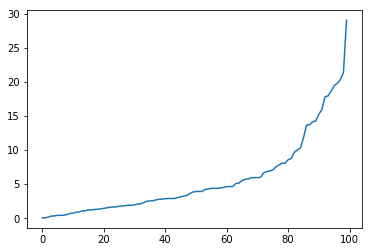

In [61]:
# Still I do not quite understand how this exponential function works
from numpy.random import RandomState
import matplotlib.pyplot as plt
a = []
for i in range(100):
    a.append(RandomState().exponential(5))
    
plt.plot(sorted(a))
plt.show()

In [10]:
# most road has no nl infor, some most of them are generated with exponential distribution
def find_nl(road):
    # some nl stored in the map
    key = [a for a in G.adj[road[0]][road[1]].keys()]
    if 'lanes' in G.adj[road[0]][road[1]][key[0]].keys():
        if len(G.adj[road[0]][road[1]][key[0]]['lanes']) > 1: # some roads has different lanes per segment, choose the first one
            lanes = int(G.adj[road[0]][road[1]][key[0]]['lanes'][0])
        else:
            lanes = int(G.adj[road[0]][road[1]][key[0]]['lanes'])
    else:
        lanes = round(1 + RandomState().exponential(0.5))
        lanes = min(lanes,4)
    return lanes

In [11]:
import json
import math
import statistics
from collections import OrderedDict
# d = 60 # this distance is working
d = 100 
# d = 10
n_intersection = len(G.nodes())
n_road = len(G.edges())
Region = {}
Region['Intersection'] = OrderedDict()
for i in range(n_intersection):
    Intersect = list(G.nodes())[i]
    Region['Intersection'][Intersect] = G.node[Intersect]
Region['Segment'] = OrderedDict()
for i in range(n_road):
    road = list(G.edges())[i]
    Region['Segment'][road] = {}
    # the length information is stored in graph
    key = [a for a in G.adj[road[0]][road[1]].keys()]
    distance = G.adj[road[0]][road[1]][key[0]]['length']
    lanes = find_nl(road)
    max_speed = find_maxspeed(road)
        
    # number of subsegments for each road
    num_sub =  int(round(distance/d))
    if num_sub == 0:
        num_sub = 1
    Region['Segment'][road]['num_sub'] = num_sub
    # Number of lanes and maximum speed for the road
    Region['Segment'][road]['lanes'] = lanes
    Region['Segment'][road]['maxspeed'] = max_speed
    # name the road with its order
    Region['Segment'][road]['id'] = check_list[road]
    Region['Segment'][road]['subs'] = []
    # define x,y for each road
    x1 = Region['Intersection'][road[0]]['x']
    x2 = Region['Intersection'][road[1]]['x']
    y1 = Region['Intersection'][road[0]]['y']
    y2 = Region['Intersection'][road[1]]['y']
    Region['Segment'][road]['X'] = [x1,x2]
    Region['Segment'][road]['Y'] = [y1,y2]
    # define stop probability
    Region['Segment'][road]['probability'] = 0
    for j in range(num_sub):
        sub_distance = distance/num_sub
        # define x,y for each road subsegment
        a1 = Region['Intersection'][road[0]]['x'] + \
        j*(Region['Intersection'][road[1]]['x'] - Region['Intersection'][road[0]]['x'])/num_sub
        a2 = Region['Intersection'][road[0]]['x'] + \
        (j+1)*(Region['Intersection'][road[1]]['x'] - Region['Intersection'][road[0]]['x'])/num_sub # x coordiante for fist segment
        
        b1 = Region['Intersection'][road[0]]['y'] + \
        j*(Region['Intersection'][road[1]]['y'] - Region['Intersection'][road[0]]['y'])/num_sub
        b2 = Region['Intersection'][road[0]]['y'] + \
        (j+1)*(Region['Intersection'][road[1]]['y'] - Region['Intersection'][road[0]]['y'])/num_sub
        
        #Region['Segment'][road]['sub'+ str(j)] = {'x':[a1,a2] ,'y':[b1,b2], 'uturn': 0}
        Region['Segment'][road]['subs'] += [{'x':[a1,a2] ,'y':[b1,b2], 'distance':sub_distance,'uturn': 0}]

In [12]:
# process Simulation file, transform the geo data to street combination
with open('Simulation.json', 'r') as f:
    Simulation = json.load(f)

In [16]:
Region['Segment']

OrderedDict([((1773060097, 1773060099),
              {'X': [-73.9975944, -73.9980743],
               'Y': [40.7140611, 40.7137811],
               'id': 1,
               'lanes': 1,
               'maxspeed': 25.0,
               'num_sub': 1,
               'probability': 0,
               'subs': [{'distance': 51.557,
                 'uturn': 0,
                 'x': [-73.9975944, -73.9980743],
                 'y': [40.7140611, 40.7137811]}]}),
             ((1773060097, 42437559),
              {'X': [-73.9975944, -73.9974922],
               'Y': [40.7140611, 40.7139962],
               'id': 2,
               'lanes': 3,
               'maxspeed': 25.0,
               'num_sub': 1,
               'probability': 0,
               'subs': [{'distance': 11.237,
                 'uturn': 0,
                 'x': [-73.9975944, -73.9974922],
                 'y': [40.7140611, 40.7139962]}]}),
             ((1773060099, 1773055865),
              {'X': [-73.9980743, -73.9986438],
  

In [16]:
G.adj[road[0]][road[1]][0]

{'geometry': <shapely.geometry.linestring.LineString at 0x20e8a282ac8>,
 'highway': 'tertiary',
 'length': 144.853,
 'maxspeed': '30',
 'name': 'Bloomfield Street',
 'oneway': True,
 'osmid': 450259392}

In [17]:
Region['Segment'][(103856986, 103864601)]

{'X': [-74.0279686, -74.0289943],
 'Y': [40.736387, 40.7365562],
 'id': 99,
 'lanes': 1,
 'maxspeed': 27.454389216027867,
 'num_sub': 1,
 'probability': 0,
 'subs': [{'distance': 88.446,
   'uturn': 0,
   'x': [-74.0279686, -74.0289943],
   'y': [40.736387, 40.7365562]}]}

In [18]:
Region['Segment'][(103856727, 3084667338)]['subs'][0]

{'distance': 96.64399999999999,
 'uturn': 0,
 'x': [-74.0254518, -74.025749],
 'y': [40.7454574, 40.74463156666667]}

In [12]:
# Add In-Out to intersection
for i in range(n_intersection):
    # the name of the road is the order of the road
    Intersect = list(G.nodes())[i]
    Roads = list(G.edges())
    Out = [i+1 for i in range(n_road) if Roads[i][0] == Intersect]
    In = [i+1 for i in range(n_road) if Roads[i][1] == Intersect]
    
    Region['Intersection'][Intersect]['In'] = In
    Region['Intersection'][Intersect]['Out'] = Out

In [66]:
Region['Intersection'][list(G.nodes())[0]]

{'In': [29, 85, 483],
 'Out': [1, 2, 3],
 'highway': 'traffic_signals',
 'osmid': 103886848,
 'x': -74.0271321,
 'y': 40.7498417}

In [13]:
# Assign stop probability to each road by the number of 'In' road with different angle
# regroup the input road that share the same traffic light
# from some examples, I plan to make the error range as 0.2, means if two roads' k close enough(less than 1)
# then the two roads share the same traffic light
from collections import defaultdict
def group_line(Input):
    Roads = list(G.edges())
    n = len(Input)
    k = {} # store the slop for every input road
    for r in Input:
        # minus one because the road index begin from 1, 1 represent 0 in Roads
        x_d = Region['Segment'][Roads[r-1]]['X'][0]-Region['Segment'][Roads[r-1]]['X'][1]
        y_d = Region['Segment'][Roads[r-1]]['Y'][0]-Region['Segment'][Roads[r-1]]['Y'][1]
        k[r] = x_d/y_d
    #regroup the input road
    group = defaultdict(list)
    group[0] = [Input[0]]
    for i in Input[1:]:
        belong_old_group = 0
        for j in range(len(group.keys())):
            content = group[j]
            if belong_old_group == 1:
                break
            for ii in range(len(content)):
                road = content[ii]
                if k[road]-1 < k[i] < k[road]+1:
                    group[j] += [i]
                    belong_old_group = 1
                    break          
        if belong_old_group == 0:
            new_group = len(group.keys())
            group[new_group] = [i]        
    return group

In [11]:
Region['Intersection'][Intersect]['In']

[101, 543]

In [37]:
Region['Segment'][Roads[r-1]]['X']

[-74.017553, -74.017553]

In [36]:
Region['Segment'][Roads[r-1]]['Y']

[40.7103718, 40.7103718]

In [14]:
# Add logic traffic stop direction ti Intersection
for i in range(n_intersection):
    Intersect = list(G.nodes())[i]
    Input = Region['Intersection'][Intersect]['In']
    Output = Region['Intersection'][Intersect]['Out']
    if len(Input) > 0 and len(Output) > 0:
        n_input = len(group_line(Input)) # calculate the number of input with different angle
        n_output = len(Output)
        Roads = list(G.edges())
        for j in range(len(Input)):
        # for each input, there would be most 2 outputs with different traffic light (left,straight)
            p = 1 - 1/(n_input*min(2,n_output))
            r = Roads[Input[j]-1]
            Region['Segment'][r]['probability'] = p

In [10]:
Region['Segment'][(103856727, 103856729)]['sub'+str(0)]['x']

[-74.0254518, -74.0261869]

In [15]:
# Find the corresponding uturn road
import numpy as np
To_road = list(Region['Segment'].keys())
for road in To_road:
    key = [a for a in G.adj[road[0]][road[1]].keys()]
    if G.adj[road[0]][road[1]][key[0]]['oneway'] != True:
        i = road[::-1]
        for road_seg in range(Region['Segment'][road]['num_sub']-1):
            target_x = Region['Segment'][road]['subs'][road_seg]['x'][::-1]
            target_y = Region['Segment'][road]['subs'][road_seg]['y'][::-1]
            dis = []
            for j in range(Region['Segment'][i]['num_sub']):  # we do not consider the segment into intersection
                x1 = Region['Segment'][i]['subs'][j]['x'][0]
                x2 = Region['Segment'][i]['subs'][j]['x'][1]
                y1 = Region['Segment'][i]['subs'][j]['y'][0]
                y2 = Region['Segment'][i]['subs'][j]['y'][1]
                # find the minimum dist from the street's end to the uturn's start
                dis.append((target_x[0] - x1)**2 + (target_y[0] - y1)**2)
            if len(dis) > 0:
                ind = np.argmin(dis)
                ind = int(ind)
                # Transform the road to its name, et, its order in the list.
                # add one because in matlab everything go from 1
                raod_name = check_list[i]
                Region['Segment'][road]['subs'][road_seg]['uturn'] = [raod_name,ind+1]    

In [16]:
# add event
import random
for i in range(n_road):
    r = list(G.edges())[i]
    Event = [0] * 200
    Region['Segment'][r]['Event'] = Event
    #if random.random() < 0.1: # 10% probability to have events
        #start = random.randint(1,n_road-300) 
        #duration = random.randint(30,500)
        #end = min(500,start+duration)
        #Event[start:end] = [0]*(end-start)
        #Region['Segment'][r]['Event'] = Event
    #else:
        #Region['Segment'][r]['Event'] = Event   

In [10]:
Region['Segment'][(103856986, 103864601)]['subs']

[{'uturn': 0, 'x': [-74.0279686, -74.028225025], 'y': [40.736387, 40.7364293]},
 {'uturn': 0,
  'x': [-74.028225025, -74.02848144999999],
  'y': [40.7364293, 40.7364716]},
 {'uturn': 0,
  'x': [-74.02848144999999, -74.02873787499999],
  'y': [40.7364716, 40.736513900000006]},
 {'uturn': 0,
  'x': [-74.02873787499999, -74.0289943],
  'y': [40.736513900000006, 40.7365562]}]

In [17]:
# Output json file
# First I need to transform every key to str
Intersection = Region['Intersection']
with open('Intercept.json', 'w') as outfile:
    json.dump(Intersection, outfile)

In [18]:
# Output json file
# First I need to transform every key to str
Segment = OrderedDict([(str(a).replace(' ','')[1:-1],b) for (a,b) in Region['Segment'].items()])
Intersection = Region['Intersection']
with open('Segment.json', 'w') as outfile:  
    json.dump(Segment, outfile)